In [1]:
import pandas as pd
import numpy as np

In [2]:
def changeForm(value):
    return int(value.replace(",",""))

In [4]:
data = pd.read_csv(r"C:\Users\DELL\Jupyter\ML\Project\Population\Population Growth.csv",converters={'Population Growth Rate':changeForm})
data

,Year,Population Growth Rate,Growth Rate
0,1950,2499322157,0.00%
1,1951,2543130380,1.75%
2,1952,2590270899,1.85%
3,1953,2640278797,1.93%
4,1954,2691979339,1.96%
...,...,...,...
69,2019,7764951032,1.06%
70,2020,7840952880,0.98%
71,2021,7909295151,0.87%
72,2022,7975105156,0.83%


In [5]:
X = data.iloc[:,0]
y = data.iloc[:,1]


In [6]:
import matplotlib.pyplot as plt

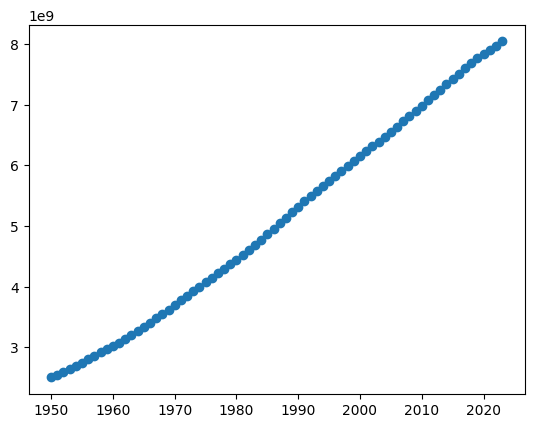

In [7]:
plt.scatter(X,y)

In [8]:
class Population:
    def fit_transform(self,X):
        self.mean = np.mean(X)
        self.deviation = (np.sum((X - self.mean)**2)/len(X))**0.5
        
        return self.transform(X)
    
    def transform(self,X):
        return np.array((X - self.mean)/self.deviation)
    
    def reverse(self,X):
        return np.array(X * self.deviation + self.mean).reshape(1,)
    
    def initilize(self):
        self.m = 0
        self.b = 0
        self.lr = 0.01
    
    def fit(self,X,y):
        self.initilize()
        for i in range(100):
            slope = -np.sum(y - self.m*X - self.b)
            self.b -= self.lr * slope
            slope = 0
            slope = -np.sum((y - self.m * X - self.b) * X)
            self.m -= self.lr * slope
            slope = 0
        
        return self.m,self.b
    
    def predict(self,X):
        return np.array(self.m * X + self.b)

In [9]:
model = Population()

In [10]:
X = model.fit_transform(X)
y = model.transform(y)


In [13]:
m,b = model.fit(X.reshape(-1,1),y.reshape(-1,1))

In [14]:
file = open("Population.txt","w")

In [15]:
file.write(f"{str(model.deviation)}\n")
file.write(f"{str(model.mean)}\n")
file.write(f"{str(m)}\n")
file.write(str(b))


18

In [16]:
file.close()